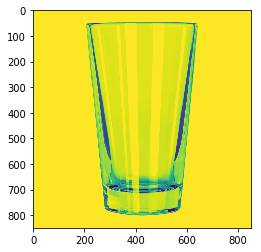

what do you think? r


In [59]:
import cv2
import tensorflow as tf
import pyttsx3
import matplotlib.pyplot as plt

CATEGORIES = ["Recycleable", "UnRecycleable"]  

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array)
    plt.show()
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("GSF2.model")

prediction = model.predict([prepare('../../../../tem/glass.jpg')])

if prediction[0][0] !=1 and prediction[0][0] !=0 and prediction[0][0]<0: 
    if(abs(1-prediction[0][0])>abs(0-prediction[0][0])):
        prediction[0][0]=1
    else:
        prediction[0][0]=0
else: 
    if(abs(1-prediction[0][0])>abs(0-prediction[0][0])):
        prediction[0][0]=0
    else:
        prediction[0][0]=1

result = CATEGORIES[int(prediction[0][0])]

engine = pyttsx3.init()
#engine.endLoop()
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[0].id)
engine.setProperty('rate', 205)

engine.say('what do you think?boy')
engine.runAndWait()
ans = input('what do you think? ')

if(ans == result):
    engine.say('You\'re correct correct. It is a ' + result + ' trash. But I think you were just lucky. ')
    engine.runAndWait()
else:
    engine.say('You dumb ass stupid idiot. It is a ' + result+ ' trash')
    engine.runAndWait()
    
engine.stop()

In [10]:
import tensorflow as tf

tf.__version__

'1.12.0'